In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from scipy import stats
import pandas as pd


In [2]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


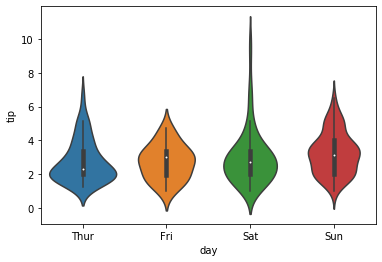

In [3]:
sns.violinplot(x='day',y='tip', data=tips)

In [4]:
y = tips['tip'].values
idx = pd.Categorical(tips['day']).codes

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
set(idx)

{0, 1, 2, 3}

In [6]:
with pm.Model() as comparing_groups:
    means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))

    y = pm.Normal('y', mu=means[idx], sd =sds[idx], observed=y)
    trace_cg =pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sds, means]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 6 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f962ded5d10>,
      dtype=object)

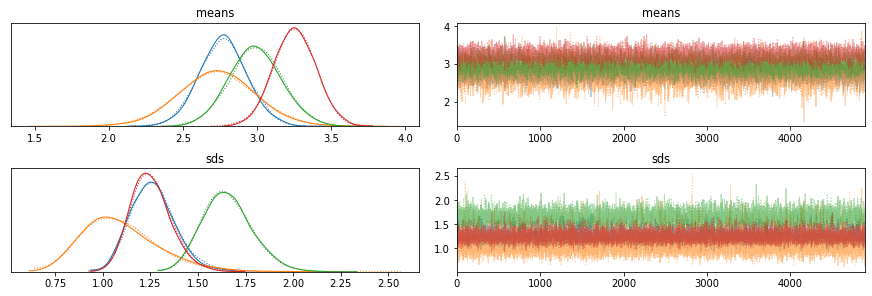

In [7]:
chain_cg = trace_cg[100::]
pm.traceplot(chain_cg)

In [9]:
pm.summary(chain_cg)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
means[0],2.775,0.161,2.471,3.073,0.002,0.001,10955.0,10955.0,10955.0,7812.0,1.0
means[1],2.733,0.252,2.264,3.213,0.003,0.002,9179.0,8896.0,9264.0,5909.0,1.0
means[2],2.994,0.177,2.673,3.332,0.002,0.001,10031.0,10031.0,10029.0,7723.0,1.0
means[3],3.253,0.144,2.980,3.521,0.001,0.001,13689.0,13689.0,13696.0,8148.0,1.0
sds[0],1.266,0.117,1.057,1.488,0.001,0.001,11549.0,11159.0,11999.0,7894.0,1.0
sds[1],1.097,0.198,0.759,1.463,0.002,0.001,11025.0,10008.0,12146.0,7321.0,1.0
sds[2],1.656,0.129,1.422,1.897,0.001,0.001,11236.0,11023.0,11494.0,7975.0,1.0
sds[3],1.254,0.105,1.076,1.461,0.001,0.001,11688.0,11374.0,12069.0,7925.0,1.0


In [17]:
comparisons = [(i,j) for i in range(4) for j in range(i+4,4)]


In [18]:
comparisons

[]